In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [13]:
interns = pd.read_csv(r"/content/raw_data_v11_3.csv")

Data Exploration

In [14]:
data = interns.copy()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Date of Birth                                                                                                                        1000 non-null   object
 1   What is your current profession?                                                                                                     1000 non-null   object
 2   What is the year of completion of your Highest Education Qualification?                                                              1000 non-null   object
 3   Which of the following best describes you?                                           

In [17]:
data.head()

,Date of Birth,What is your current profession?,What is the year of completion of your Highest Education Qualification?,Which of the following best describes you?,Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course.,"In case your certification institute is ""Innomatics Research Labs"", please provide your Enrolled Batch Number.",Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship.,What do you think are most important skill right now for a skilled Data Scientist?
0,9/16/2000,Fresher (I have completed my Education and loo...,7/30/2023,I am currently enrolled in a Data Science cert...,Innomatics Research Labs,251,6:00 to 7:00 PM IST,Extracting actionable insights from the raw da...
1,2/6/1998,Fresher (I have completed my Education and loo...,5/18/2022,I have never enrolled in any certification cou...,NaN,NaN,6:00 to 7:00 PM IST,Extracting actionable insights from the raw data
2,10/8/2003,Student (I am currently enrolled in some Educa...,4/1/2025,I am currently enrolled in a Data Science cert...,NaN,NaN,6:00 to 7:00 PM IST,Data Modelling
3,11/29/2001,Student (I am currently enrolled in some Educa...,5/15/2024,I have never enrolled in any certification cou...,NaN,NaN,5:00 to 6:00 PM IST,Extracting actionable insights from the raw da...
4,11/25/2004,Student (I am currently enrolled in some Educa...,1/10/2026,I have completed a Data Science certification ...,Velagapudi ramakrishna Siddhartha college,Na,6:00 to 7:00 PM IST,Extracting actionable insights from the raw da...


Data Cleaning

In [18]:
data.duplicated().sum()

2

In [19]:
data = data.drop_duplicates()

In [20]:
data.duplicated().sum()

0

In [21]:
data.isnull().sum()

Date of Birth                                                                                                                            0
What is your current profession?                                                                                                         0
What is the year of completion of your Highest Education Qualification?                                                                  0
Which of the following best describes you?                                                                                               0
Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course.    321
In case your certification institute is "Innomatics Research Labs", please provide your Enrolled Batch Number.                         660
Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship.        0
What do you think are most 

What is the current profession of most interns?

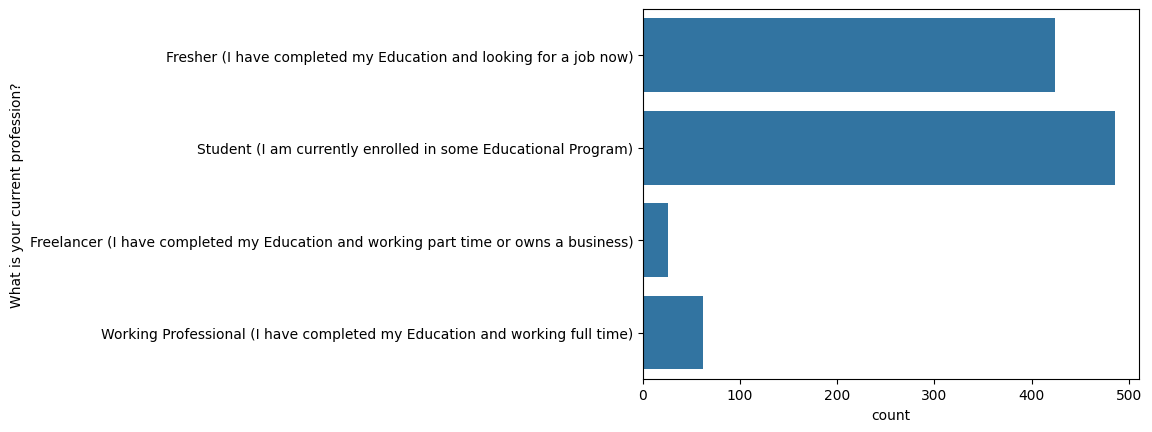

In [27]:
sns.countplot(data["What is your current profession?"])
plt.show()

What are the preferred LIVE session timings?

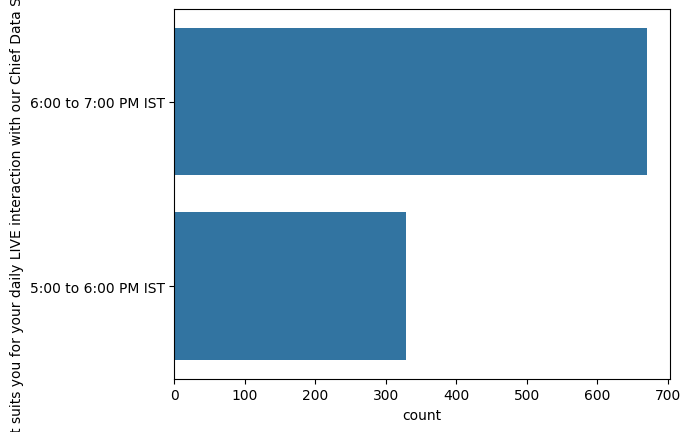

In [28]:
sns.countplot(data["Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship."])
plt.show()

How many interns are enrolled or have completed their data science professional courses?

In [29]:
data["Which of the following best describes you?"].unique()

array(['I am currently enrolled in a Data Science certification course',
       'I have never enrolled in any certification courses',
       'I have completed a Data Science certification course'],
      dtype=object)

In [33]:
data.loc[(data["Which of the following best describes you?"]=='I am currently enrolled in a Data Science certification course') | (data["Which of the following best describes you?"]=='I have completed a Data Science certification course')].count()

Date of Birth                                                                                                                          697
What is your current profession?                                                                                                       697
What is the year of completion of your Highest Education Qualification?                                                                697
Which of the following best describes you?                                                                                             697
Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course.    656
In case your certification institute is "Innomatics Research Labs", please provide your Enrolled Batch Number.                         321
Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship.      697
What do you think are most 

For interns who never enrolled in a data science certification course, what is the current profession of the majority of them?

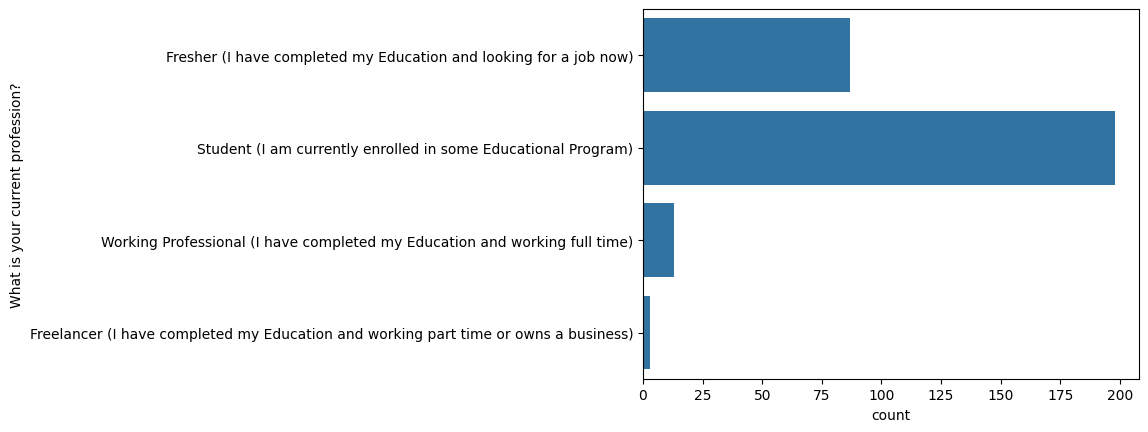

In [44]:
sns.countplot(data.loc[data["Which of the following best describes you?"]=='I have never enrolled in any certification courses',"What is your current profession?"])
plt.show()

Which skill is the third most important for a data scientist?

In [74]:
flat_list = [item for sublist in data['What do you think are most important skill right now for a skilled Data Scientist?'] for item in sublist.split(", ")]

print(pd.Series(flat_list).value_counts())

Extracting actionable insights from the raw data          868
Data Modelling                                            825
MLOps                                                     596
LLMs                                                      533
Basics of backend application development using python    520
Prompt Engineering                                        424
dtype: int64


How many interns selected “Prompt Engineering” as the most important skill?

In [75]:
flat_list = [item for sublist in data['What do you think are most important skill right now for a skilled Data Scientist?'] for item in sublist.split(", ")]

print(pd.Series(flat_list).value_counts())

Extracting actionable insights from the raw data          868
Data Modelling                                            825
MLOps                                                     596
LLMs                                                      533
Basics of backend application development using python    520
Prompt Engineering                                        424
dtype: int64


What is the minimum age of an intern at Innomatics Research Labs?

In [84]:
max(data["Date of Birth"])

'9/9/2001'

In [85]:
2024-2001

23

How many interns were born on a Sunday?

In [86]:
data["Date of Birth"] = pd.to_datetime(data["Date of Birth"])


data['day_of_week_name'] = data["Date of Birth"].dt.strftime('%A')

data.loc[data['day_of_week_name']=="Sunday"].count()

Date of Birth                                                                                                                          125
What is your current profession?                                                                                                       125
What is the year of completion of your Highest Education Qualification?                                                                125
Which of the following best describes you?                                                                                             125
Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course.     91
In case your certification institute is "Innomatics Research Labs", please provide your Enrolled Batch Number.                          44
Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship.      125
What do you think are most 

In which month do the majority of interns are born?

In [95]:
data['month'] = data["Date of Birth"].dt.strftime('%B')

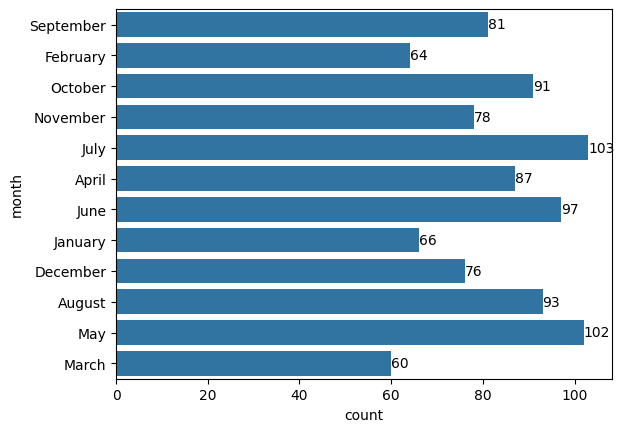

In [105]:
br=sns.countplot(data["month"])
plt.bar_label(br.containers[0],fontsize=10)
plt.show()

What is the median age of a working professional?

In [109]:
from datetime import datetime

In [113]:
(datetime.now().year-data.loc[data["What is your current profession?"]=='Working Professional (I have completed my Education and working full time)',"Date of Birth"].dt.year).median()


27.0

What is the maximum age of a freelancer?

In [116]:
max(datetime.now().year-data.loc[data["What is your current profession?"]=='Freelancer (I have completed my Education and working part time or owns a business)',"Date of Birth"].dt.year)


44

How many interns didn’t mention the name of the data science institute from where they completed or are currently pursuing the courses?

In [124]:
data.loc[(data["Which of the following best describes you?"]=='I am currently enrolled in a Data Science certification course') | (data["Which of the following best describes you?"]=='I have completed a Data Science certification course'), "Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course."].isnull().sum()

41

How many interns mentioned Innomatics as their data science institute?

In [127]:
data.loc[data["Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course."]=='Innomatics Research Labs'].count()

Date of Birth                                                                                                                          109
What is your current profession?                                                                                                       109
What is the year of completion of your Highest Education Qualification?                                                                109
Which of the following best describes you?                                                                                             109
Please mention the name of the institute where you have completed or are currently pursuing your Data Science Certification Course.    109
In case your certification institute is "Innomatics Research Labs", please provide your Enrolled Batch Number.                         108
Please indicate the time that suits you for your daily LIVE interaction with our Chief Data Scientist as part of your internship.      109
What do you think are most 